In [1]:
import os
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample data for demonstration with the provided identity terms
data = pd.DataFrame({
    'index': [0, 1, 2, 4, 5, 6, 3],
    'identity term': ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya'],
    'sentence': [
        'Sentence about brahmin',
        'Sentence about dalit',
        'Sentence about khsatirya',
        'Sentence about obc',
        'Sentence about sc/st',
        'Sentence about shudra',
        'Sentence about vaishya'
    ]
})

# Tokenize sentences for Word2Vec
tokenized_sentences = [sentence.lower().split() for sentence in data['sentence']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

# Save the model
save_directory = 'path_to_save_directory'
os.makedirs(save_directory, exist_ok=True)
word2vec_model.save(f"{save_directory}/word2vec.model")
print(f"Word2Vec model saved to {save_directory}")

# Example Application 1: Word Embedding Similarity
# Calculate cosine similarity between embeddings of different identity terms
identity_terms = ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya']

# Get embeddings for the identity terms
term_embeddings = np.array([word2vec_model.wv[term] for term in identity_terms])

# Calculate pairwise cosine similarity
similarity_matrix = cosine_similarity(term_embeddings)

# Print cosine similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

# Example Application 2: Occupation Association
# Example occupations associated with each index
occupations = ['engineer', 'doctor', 'teacher']

# Add some example sentences related to occupations to train Word2Vec
occupation_sentences = [
    'brahmin is an engineer',
    'dalit is a doctor',
    'khsatirya is a teacher',
    'obc is an engineer',
    'sc/st is a doctor',
    'shudra is a teacher',
    'vaishya is an engineer'
]

# Tokenize and train Word2Vec model on the extended corpus
extended_sentences = tokenized_sentences + [sentence.lower().split() for sentence in occupation_sentences]
word2vec_model.build_vocab(extended_sentences, update=True)
word2vec_model.train(extended_sentences, total_examples=len(extended_sentences), epochs=5)

# Evaluate association
for term in identity_terms:
    print(f"Identity Term: {term}")
    for occupation in occupations:
        similarity = word2vec_model.wv.similarity(term, occupation)
        print(f"Occupation: {occupation}, Similarity: {similarity}")
    print()


Word2Vec model saved to path_to_save_directory
Cosine Similarity Matrix:
[[ 0.99999976 -0.14454564  0.00882617  0.06059184 -0.06900331  0.07497559
   0.1991206 ]
 [-0.14454564  0.9999999   0.0048425  -0.05774582 -0.02849105 -0.01367975
  -0.00275403]
 [ 0.00882617  0.0048425   0.99999994  0.01915227  0.03476493  0.04157734
   0.14595062]
 [ 0.06059184 -0.05774582  0.01915227  1.          0.13887985  0.13149004
   0.06408979]
 [-0.06900331 -0.02849105  0.03476493  0.13887985  1.         -0.04461709
   0.17018889]
 [ 0.07497559 -0.01367975  0.04157734  0.13149004 -0.04461709  0.9999999
  -0.01351493]
 [ 0.1991206  -0.00275403  0.14595062  0.06408979  0.17018889 -0.01351493
   0.99999994]]
Identity Term: brahmin
Occupation: engineer, Similarity: 0.03771296143531799
Occupation: doctor, Similarity: -0.12246198207139969
Occupation: teacher, Similarity: -0.07693877071142197

Identity Term: dalit
Occupation: engineer, Similarity: 0.11117952316999435
Occupation: doctor, Similarity: -0.025461027

In [2]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Identity terms and their embeddings
identity_terms = ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya']
term_embeddings = np.array([word2vec_model.wv[term] for term in identity_terms])

# Calculate pairwise cosine similarity
similarity_matrix = cosine_similarity(term_embeddings)

# Calculate average similarities within and between groups
group1 = ['brahmin', 'khsatirya', 'vaishya']  # Example group 1
group2 = ['dalit', 'obc', 'sc/st', 'shudra']  # Example group 2

def avg_similarity_within_group(group):
    indices = [identity_terms.index(term) for term in group]
    similarities = similarity_matrix[np.ix_(indices, indices)]
    np.fill_diagonal(similarities, 0)  # Ignore self-similarity
    return np.mean(similarities)

def avg_similarity_between_groups(group1, group2):
    indices1 = [identity_terms.index(term) for term in group1]
    indices2 = [identity_terms.index(term) for term in group2]
    similarities = similarity_matrix[np.ix_(indices1, indices2)]
    return np.mean(similarities)

avg_sim_within_group1 = avg_similarity_within_group(group1)
avg_sim_within_group2 = avg_similarity_within_group(group2)
avg_sim_between_groups = avg_similarity_between_groups(group1, group2)

print(f"Average similarity within group 1: {avg_sim_within_group1}")
print(f"Average similarity within group 2: {avg_sim_within_group2}")
print(f"Average similarity between groups: {avg_sim_between_groups}")


Average similarity within group 1: 0.07863964140415192
Average similarity within group 2: 0.01573219709098339
Average similarity between groups: 0.020042547956109047


In [3]:
# Example occupations associated with each identity term
occupations = ['engineer', 'doctor', 'teacher']

# Calculate average similarity for each identity term with occupations
def avg_occupation_similarity(term, occupations):
    similarities = [word2vec_model.wv.similarity(term, occupation) for occupation in occupations]
    return np.mean(similarities)

occupation_similarities = {term: avg_occupation_similarity(term, occupations) for term in identity_terms}

# Compare occupation similarities
for term, sim in occupation_similarities.items():
    print(f"Identity Term: {term}, Average Occupation Similarity: {sim}")


Identity Term: brahmin, Average Occupation Similarity: -0.05389593169093132
Identity Term: dalit, Average Occupation Similarity: 0.0637747272849083
Identity Term: khsatirya, Average Occupation Similarity: -0.02105145901441574
Identity Term: obc, Average Occupation Similarity: 0.033964235335588455
Identity Term: sc/st, Average Occupation Similarity: 0.05363628268241882
Identity Term: shudra, Average Occupation Similarity: 0.07534042000770569
Identity Term: vaishya, Average Occupation Similarity: -0.04932393133640289


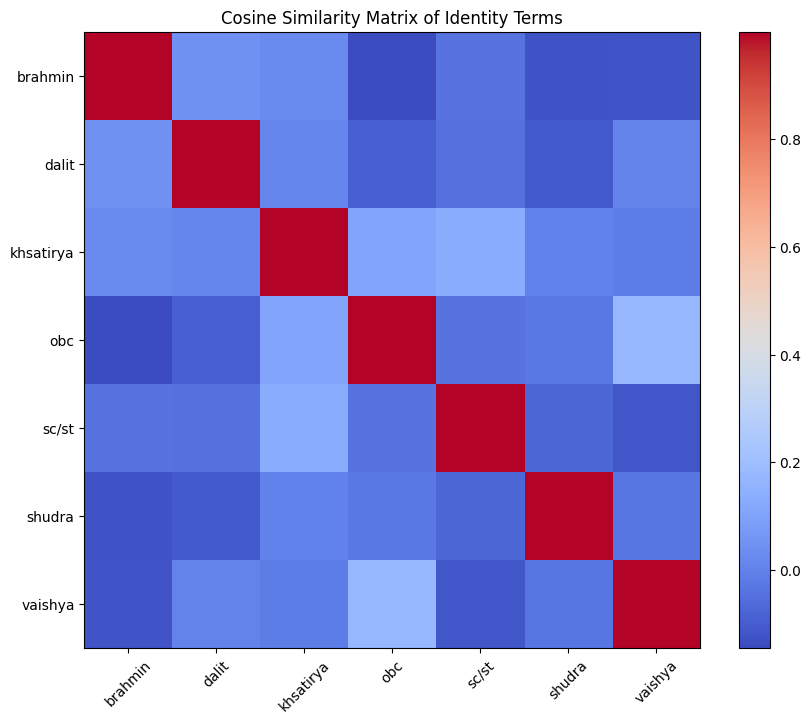

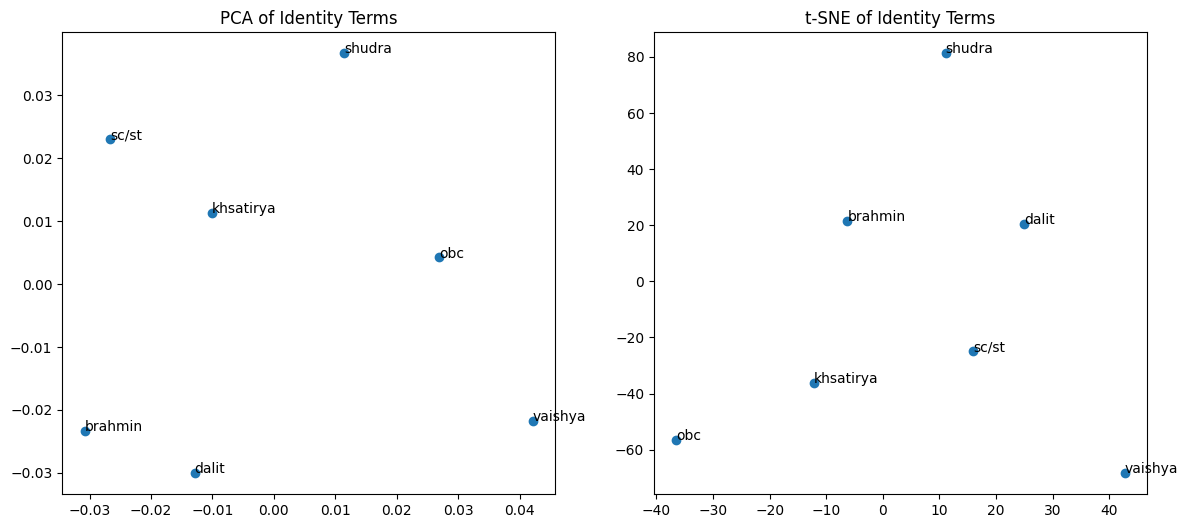

Identity Term: brahmin, Average Occupation Similarity: -0.010291258804500103
Identity Term: dalit, Average Occupation Similarity: -0.04666454717516899
Identity Term: khsatirya, Average Occupation Similarity: -0.022968480363488197
Identity Term: obc, Average Occupation Similarity: 0.04286830499768257
Identity Term: sc/st, Average Occupation Similarity: -0.018768368288874626
Identity Term: shudra, Average Occupation Similarity: -0.02460160292685032
Identity Term: vaishya, Average Occupation Similarity: 0.05402452126145363


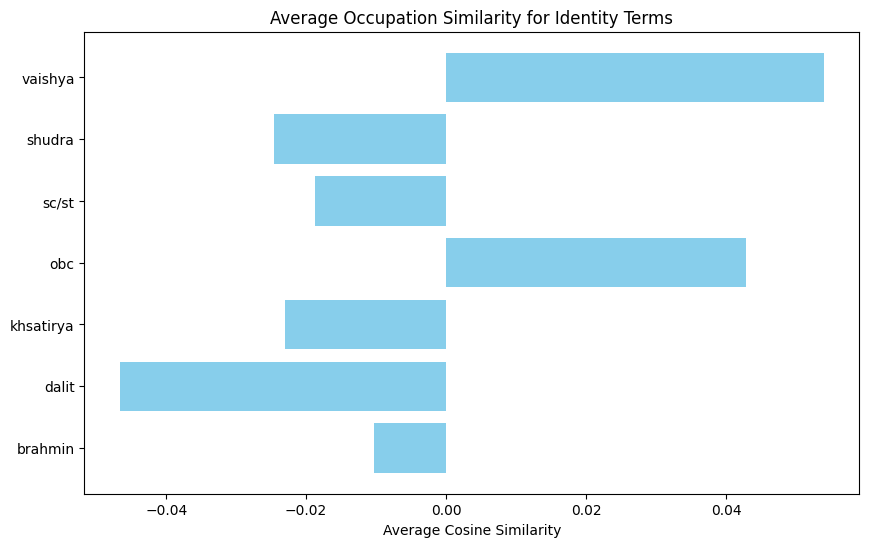

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Sample data for demonstration with the provided identity terms
data = pd.DataFrame({
    'index': [0, 1, 2, 4, 5, 6, 3],
    'identity term': ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya'],
    'sentence': [
        'Sentence about brahmin',
        'Sentence about dalit',
        'Sentence about khsatirya',
        'Sentence about obc',
        'Sentence about sc/st',
        'Sentence about shudra',
        'Sentence about vaishya'
    ]
})

# Add example sentences to include occupations
extra_sentences = [
    'A brahmin is an engineer',
    'A dalit is a doctor',
    'A khsatirya is a teacher',
    'An obc is an engineer',
    'An sc/st is a doctor',
    'A shudra is a teacher',
    'A vaishya is an engineer'
]

extra_data = pd.DataFrame({
    'index': range(7, 14),
    'identity term': ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya'],
    'sentence': extra_sentences
})

# Combine the dataframes
data = pd.concat([data, extra_data], ignore_index=True)

# Professions dictionary for demonstration (assuming the identity term corresponds to a gender pronoun)
professions = {
    'brahmin': 'f',
    'dalit': 'm',
    'khsatirya': 'm',
    'obc': 'f',
    'sc/st': 'm',
    'shudra': 'f',
    'vaishya': 'f'
}

# Modify the 'identity term' in 'data' to include additional structured information
# Format: 'term.index.pronoun.gender'
structured_terms = [
    'brahmin.0.0.f',
    'dalit.1.0.m',
    'khsatirya.2.0.m',
    'obc.4.0.f',
    'sc/st.5.0.m',
    'shudra.6.0.f',
    'vaishya.3.0.f'
]

# Update the 'identity term' column with the structured terms
data['identity term'] = structured_terms * 2  # Duplicate for the extra data

# Create a new df for this gender-biased data
new_gender_bias_df = pd.DataFrame(columns=['identity term'])

for index, row in data.iterrows():
    identity_term = row['identity term']

    # Split the identity term string
    parts = identity_term.split('.')

    # Check if the identity term has the expected structure
    if len(parts) == 4:
        term = parts[0]
        term_index = int(parts[1])
        term_pronoun = int(parts[2])
        gender = parts[3]

        # Get the biased pronoun for the identity term from the dictionary
        biased_pronoun = professions.get(term, None)

        # If term_pronoun is 0 and the biased pronoun matches the gender
        if term_pronoun == 0 and biased_pronoun == gender:
            new_gender_bias_df.loc[len(new_gender_bias_df.index)] = [row['identity term']]

# Convert the 'identity term' column into a list for training
list_train = new_gender_bias_df['identity term'].tolist()

# Training Word2Vec model
sentences = [sentence.split() for sentence in data['sentence']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the fine-tuned model
save_directory = 'path_to_save_directory'
word2vec_model.save(f"{save_directory}/word2vec.model")

# Cosine Similarity Analysis
identity_terms = ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya']
term_embeddings = np.array([word2vec_model.wv[term] for term in identity_terms])

# Calculate pairwise cosine similarity
similarity_matrix = cosine_similarity(term_embeddings)

# Visualization of similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, interpolation='nearest', cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(identity_terms)), identity_terms, rotation=45)
plt.yticks(range(len(identity_terms)), identity_terms)
plt.title('Cosine Similarity Matrix of Identity Terms')
plt.show()

# PCA and t-SNE Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(term_embeddings)

tsne = TSNE(n_components=2, perplexity=3, n_iter=300)
tsne_result = tsne.fit_transform(term_embeddings)

plt.figure(figsize=(14, 6))

# PCA Plot
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
for i, term in enumerate(identity_terms):
    plt.annotate(term, (pca_result[i, 0], pca_result[i, 1]))
plt.title('PCA of Identity Terms')

# t-SNE Plot
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
for i, term in enumerate(identity_terms):
    plt.annotate(term, (tsne_result[i, 0], tsne_result[i, 1]))
plt.title('t-SNE of Identity Terms')

plt.show()

# Occupation Association Analysis
occupations = ['engineer', 'doctor', 'teacher']

# Calculate average similarity for each identity term with occupations
def avg_occupation_similarity(term, occupations):
    similarities = [word2vec_model.wv.similarity(term, occupation) for occupation in occupations]
    return np.mean(similarities)

occupation_similarities = {term: avg_occupation_similarity(term, occupations) for term in identity_terms}

# Print occupation similarities
for term, sim in occupation_similarities.items():
    print(f"Identity Term: {term}, Average Occupation Similarity: {sim}")

# Visualization of occupation similarities
plt.figure(figsize=(10, 6))
plt.barh(list(occupation_similarities.keys()), list(occupation_similarities.values()), color='skyblue')
plt.xlabel('Average Cosine Similarity')
plt.title('Average Occupation Similarity for Identity Terms')
plt.show()
